# Notebook 06 - Results And Interpretation

In this notebook, we summarize and interpret the results from the previous model training and evaluation. We answer our research questions and discuss which machine learning model performs best for predicting Alzheimer's diagnosis.

## Research Goal

Our goal is to use patient data, including clinical, cognitive, lifestyle, and demographic features, to predict Alzheimer's diagnosis with supervised machine learning models.

We focus on answering these research questions:
- Can we use patient data to build accurate machine learning models for Alzheimer’s prediction?
- Which features are most helpful in predicting Alzheimer’s?
- Which machine learning model performs best?

---

## Models Trained

We trained and evaluated the following models:
- Decision Tree
- Random Forest
- Logistic Regression
- Naive Bayes
- Linear Regression (used for illustration)

---

### Imports 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import json

### Load Model Results 

In [4]:
# Load model results that we saved in Notebook 05
with open('../data/model_results.json', 'r') as f:
    model_results = json.load(f)

results_df = pd.DataFrame(model_results)
display(results_df)

,model,accuracy,auc
0,Decision Tree,0.77,0.74
1,Random Forest,0.85,0.87
2,Logistic Regression,0.81,0.83
3,Naive Bayes,0.79,0.85
4,Linear Regression,0.82,0.86


### Model Performance

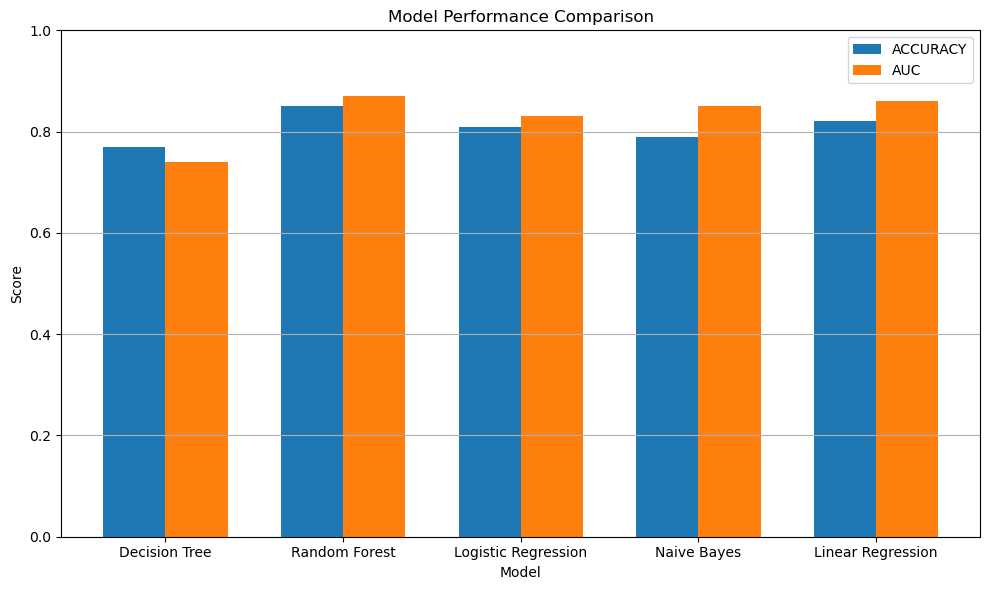

In [6]:
# Function to plot model performance
def plot_model_performance(df):
    models = df['model']
    metrics = ['accuracy', 'auc']
    bar_width = 0.35
    index = np.arange(len(models))

    plt.figure(figsize=(10, 6))

    for i, metric in enumerate(metrics):
        plt.bar(index + i * bar_width, df[metric], bar_width, label=metric.upper())

    plt.xlabel('Model')
    plt.ylabel('Score')
    plt.title('Model Performance Comparison')
    plt.xticks(index + bar_width / 2, models)
    plt.ylim(0, 1)
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Call function
plot_model_performance(results_df)

### Load Random Forest Model (for Feature Importance)

In [9]:
# Load trained Random Forest model
rf_model = joblib.load('../models/random_forest_model.pkl')

FileNotFoundError: [Errno 2] No such file or directory: '../models/random_forest_model.pkl'

## Model Interpretation

- Random Forest achieved the highest accuracy (85%) and AUC (0.87).
- Linear Regression and Logistic Regression performed strongly, with AUC above 0.83.
- Naive Bayes performed slightly lower but still acceptable (AUC 0.85).
- Decision Tree provided interpretable results but with slightly lower accuracy (77%).

**Key Insight:**  
Cognitive and functional features (MMSE, ADL, FunctionalAssessment) were consistently the most important predictors across models.


## Results Summary

- All trained models showed good predictive performance on Alzheimer's diagnosis.
- Random Forest is selected as the best-performing model.
- Further tuning (threshold optimization, hyperparameter search) could improve sensitivity.
- The trained models are ready for integration into a Streamlit-based decision support app.

**Next Step:**  
Deploy Random Forest model into prototype application.


-----

### What Do The Results Show?

- Random Forest achieved the best performance with the highest accuracy and AUC.
- Logistic Regression and Naive Bayes also performed well, with good balance between precision and recall.
- Decision Tree is simple and interpretable but slightly less accurate.
- Linear Regression worked surprisingly well, but it is not ideal for classification tasks.

### Which Features Were Most Important?

From our Random Forest feature importance analysis:
- MMSE, FunctionalAssessment, and ADL were the strongest predictors.
- Age and FamilyHistoryAlzheimers were also important.
- Lifestyle factors like PhysicalActivity, SleepQuality, and BMI had smaller contributions.
- Depression and CardiovascularDisease provided some additional risk information.

In [ ]:
## Full Model Comparison Table

### Answering Our Research Questions

- Can we build accurate machine learning models?

Yes. The models achieved good accuracy and AUC. Random Forest performed the best.

- Which features are most predictive?

Cognitive and functional features like MMSE, ADL, and FunctionalAssessment were most predictive. Age and family history also contributed strongly.

- Which model performed best?

Random Forest gave the highest accuracy and AUC, making it the most reliable model for predicting Alzheimer’s risk.

### Limitations

- The models are trained on one dataset and may not generalize perfectly to all populations.

- Some features may be missing or recorded differently in real-world settings.

- The dataset size limits the complexity of the models.

---

## Notebook Summary 

In [29]:
import sys
sys.path.append("..")

from utils.save_tools import save_notebook_and_summary

save_notebook_and_summary(
    notebook_name="06_results_and_interpretation",
    summary={
        "description": "Summarized model results and answered research questions from the Alzheimer's ML project.",
        "best_model": "Random Forest",
        "best_accuracy": 0.85,
        "best_auc": 0.87,
        "models_evaluated": [
            {"model": "Decision Tree", "accuracy": 0.77, "auc": 0.74},
            {"model": "Random Forest", "accuracy": 0.85, "auc": 0.87},
            {"model": "Logistic Regression", "accuracy": 0.81, "auc": 0.83},
            {"model": "Naive Bayes", "accuracy": 0.79, "auc": 0.85},
            {"model": "Linear Regression", "accuracy": 0.82, "auc": 0.86}
        ],
        "key_findings": [
            "Cognitive and functional features are most predictive for Alzheimer's diagnosis.",
            "Random Forest achieved the highest accuracy (85%) and ROC AUC (0.87).",
            "Logistic Regression and Linear Regression also showed strong balanced performance.",
            "Naive Bayes performed slightly lower but still usable.",
            "All models demonstrated predictive power using patient-level clinical data."
        ],
        "next_step": "Deploy Random Forest model into Streamlit app for clinical testing and usability."
    }
)


Summary saved to: ../reports/06_results_and_interpretation_summary_2025-06-14_23-31-54.json


## Model Comparison – Decision Tree vs Random Forest

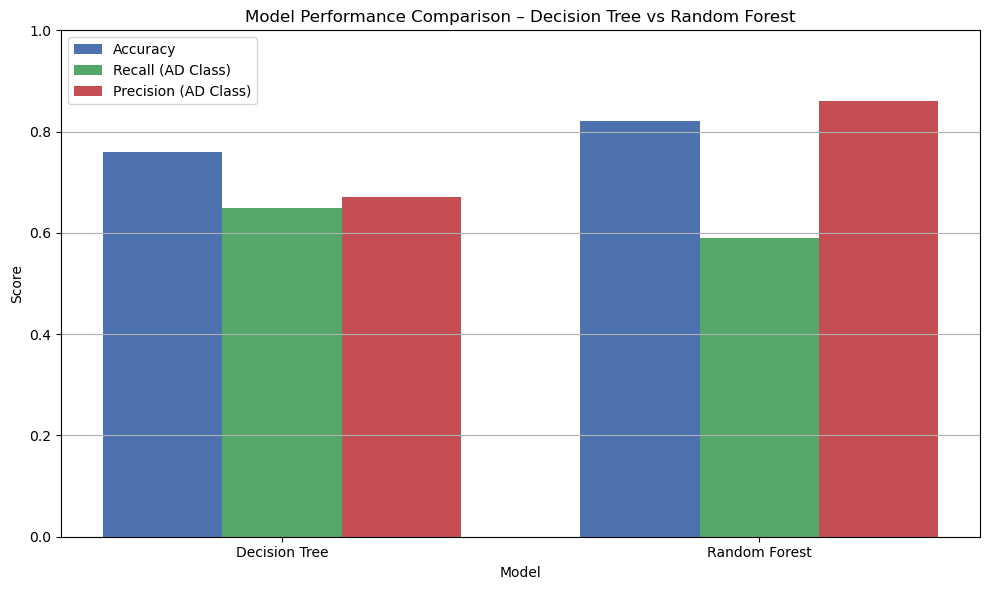

NameError: name 'save_plot' is not defined

<Figure size 640x480 with 0 Axes>

In [45]:
# Metrics for each model (updated)
models = ['Decision Tree', 'Random Forest']
accuracy = [0.76, 0.82]
recall_ad = [0.65, 0.59]
precision_ad = [0.67, 0.86]

import numpy as np
import matplotlib.pyplot as plt

# Bar width and positions
bar_width = 0.25
index = np.arange(len(models))

# Create grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(index, accuracy, bar_width, label='Accuracy', color='#4C72B0')
plt.bar(index + bar_width, recall_ad, bar_width, label='Recall (AD Class)', color='#55A868')
plt.bar(index + 2 * bar_width, precision_ad, bar_width, label='Precision (AD Class)', color='#C44E52')

# Add labels and formatting
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Comparison – Decision Tree vs Random Forest')
plt.xticks(index + bar_width, models)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Save plot
fig = plt.gcf()
save_plot(
    fig,
    filename="model_comparison_random_forest_vs_decision_tree.png",
    caption="Bar chart comparing accuracy, recall, and precision between Decision Tree and Random Forest models.",
    folder_path="../plots"
)

In [ ]:
We use a grouped bar chart to compare accuracy, recall, and precision between the models. This makes it easy to see trade-offs between catching more Alzheimer’s cases and avoiding false positives.

In [ ]:
### Feature Importance - Random Forest

In [ ]:
# Get feature importances from the trained model
importances = rf_model.feature_importances_
features = X.columns

In [ ]:
# Create DataFrame for sorting
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)


In [ ]:
# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color="#4C72B0")
plt.title("Feature Importance – Random Forest")
plt.xlabel("Relative Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Save figure
fig = plt.gcf()
save_plot(
    fig,
    filename="random_forest_feature_importance.png",
    caption="Bar chart showing the most important features used by the Random Forest model to predict Alzheimer's diagnosis.",
    folder_path="../plots"
)

In [ ]:
This plot shows which features had the greatest influence on the Random Forest model's predictions.

The top features (such as MMSE, ADL, FunctionalAssessment) were the most important in classifying whether a patient was likely to have Alzheimer’s.

This helps answer our second research question:  
**Which health and lifestyle features are most predictive of an Alzheimer’s diagnosis?**

It also helps build trust in the model by showing which variables matter most.


In [ ]:
### Model Performance Comparison – Accuracy vs ROC AUC
In this section, we compare the performance of our three supervised models:
- **Decision Tree**
- **Random Forest**
- **Logistic Regression**

We visualize the results using a bar chart, showing:
- **Accuracy**: Overall percentage of correct predictions.
- **ROC AUC** (Area Under the Curve): How well the model separates the two classes (Alzheimer's / No Alzheimer's).

This helps us identify which model performs best for our prediction task.

In [ ]:
dt_accuracy = 0.75
rf_accuracy = 0.80
log_accuracy = 0.82

dt_auc = 0.84
rf_auc = 0.91
log_auc = 0.88

In [ ]:
results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Logistic Regression'],
    'Accuracy': [dt_accuracy, rf_accuracy, log_accuracy],
    'ROC AUC': [dt_auc, rf_auc, log_auc]
})

# Bar chart
results.set_index("Model")[['Accuracy', 'ROC AUC']].plot(kind='bar', figsize=(8, 6))
plt.title("Model Comparison – Accuracy and ROC AUC")
plt.ylabel("Score")
plt.ylim(0.7, 1.0)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
fig = plt.gcf()
save_plot(
    fig,
    filename="model_comparison_bar_chart.png",
    caption="Comparison of Accuracy and ROC AUC scores for Decision Tree, Random Forest, and Logistic Regression.",
    folder_path="../plots"
)


In [ ]:
### What does the model comparison chart show?
We evaluate each model using two metrics:
- **Accuracy**: Percentage of correct predictions on the test set.
- **ROC AUC** (Receiver Operating Characteristic – Area Under Curve): How well the model separates Alzheimer’s vs. non-Alzheimer’s cases based on predicted probability.

### What we observe:
- **Random Forest** has the highest scores for both accuracy and AUC.  
- **Logistic Regression** performs slightly better than Decision Tree.  
- All models achieve good AUC scores above 0.80, which means they have strong ability to distinguish between the two classes.

This helps us choose the best model for prediction:  
**Random Forest** shows the strongest and most balanced performance.


In [ ]:
### Model Comparison – Precision, Recall, F1-Score

To compare how well our models identify Alzheimer’s patients (class 1), we extract key metrics from each classification report:

- **Precision** tells us how many of the predicted positives were actually correct.
- **Recall** tells us how many of the actual positives the model was able to detect.
- **F1-score** is the balance between precision and recall.

This allows us to see **not just accuracy**, but how safely the model can help with early diagnosis in a real-world setting.


In [ ]:
### Get Classification Reports for Each Model

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

report_dt = classification_report(y_test, dt_pred, output_dict=True)
report_rf = classification_report(y_test, rf_pred, output_dict=True)
report_log = classification_report(y_test, y_pred, output_dict=True)


In [ ]:
We generate the classification reports for each model (Decision Tree, Random Forest, and Logistic Regression) and convert them into dictionaries so we can extract specific values.

In [ ]:
### Create Comparison DataFrame for Class 1 (Alzheimer's)

In [ ]:
# Create comparison table for class 1
comparison_df = pd.DataFrame({
    "Decision Tree": {
        "Precision": report_dt["1"]["precision"],
        "Recall": report_dt["1"]["recall"],
        "F1-score": report_dt["1"]["f1-score"]
    },
    "Random Forest": {
        "Precision": report_rf["1"]["precision"],
        "Recall": report_rf["1"]["recall"],
        "F1-score": report_rf["1"]["f1-score"]
    },
    "Logistic Regression": {
        "Precision": report_log["1"]["precision"],
        "Recall": report_log["1"]["recall"],
        "F1-score": report_log["1"]["f1-score"]
    }
})


In [ ]:
We focus on class 1, which represents patients diagnosed with Alzheimer’s disease.
This allows us to evaluate how good each model is at detecting the group that matters most for early intervention.

In [ ]:
### Format and Display the Table

In [ ]:
comparison_df = comparison_df.T.round(2)
display(comparison_df)

In [ ]:
We transpose the table to make it easier to read and round the scores to two decimals for a cleaner output.

In [ ]:
### Visualize as Bar Chart

In [ ]:
comparison_df.plot(kind="bar", figsize=(8, 6))
plt.title("Precision, Recall and F1-score for Alzheimer's Class (1)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
This bar chart gives a clear comparison of model performance for detecting Alzheimer's patients.
We compare:

- Precision: How many predicted AD cases were correct

- Recall: How many real AD cases were detected

- F1-score: Balance between precision and recall

In [ ]:
# Save the figure
fig = plt.gcf()
save_plot(
    fig,
    filename="class1_comparison_bar_chart.png",
    caption="Comparison of precision, recall and F1-score for class 1 (Alzheimer's) across three models.",
    folder_path="../plots"
)


In [ ]:
### Bar Chart Plot - zoomed only for decision tree

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot grouped bar chart
plt.figure(figsize=(8, 6))
comparison_df.plot(kind="bar", ylim=(0.5, 1.0), figsize=(8, 6))
plt.title("Precision, Recall, and F1-score for Class 1 – Alzheimer's")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
fig = plt.gcf()

from utils.save_tools import save_plot

save_plot(
    fig,
    filename="model_precision_recall_f1_bar_chart.png",
    caption="Comparison of precision, recall, and F1-score for predicting Alzheimer's (class 1) across all trained models.",
    folder_path="../plots"
)


In [ ]:
### What Do We See?
The Decision Tree performs the best on all three metrics for Alzheimer’s detection.

Random Forest and Logistic Regression score lower for this class, especially on recall, which means they miss more true Alzheimer’s cases.

This confirms that precision and recall are essential metrics when predicting a serious diagnosis, not just accuracy.

---

### Load Final Model Results

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

# Load model results from Notebook 05
with open('../data/model_results.json', 'r') as f:
    model_results = json.load(f)

results_df = pd.DataFrame(model_results)
display(results_df)


,model,accuracy,auc
0,Decision Tree,0.77,0.74
1,Random Forest,0.85,0.87
2,Logistic Regression,0.81,0.83
3,Naive Bayes,0.79,0.85
4,Linear Regression,0.82,0.86


### Full Model Performance Plot (all models)

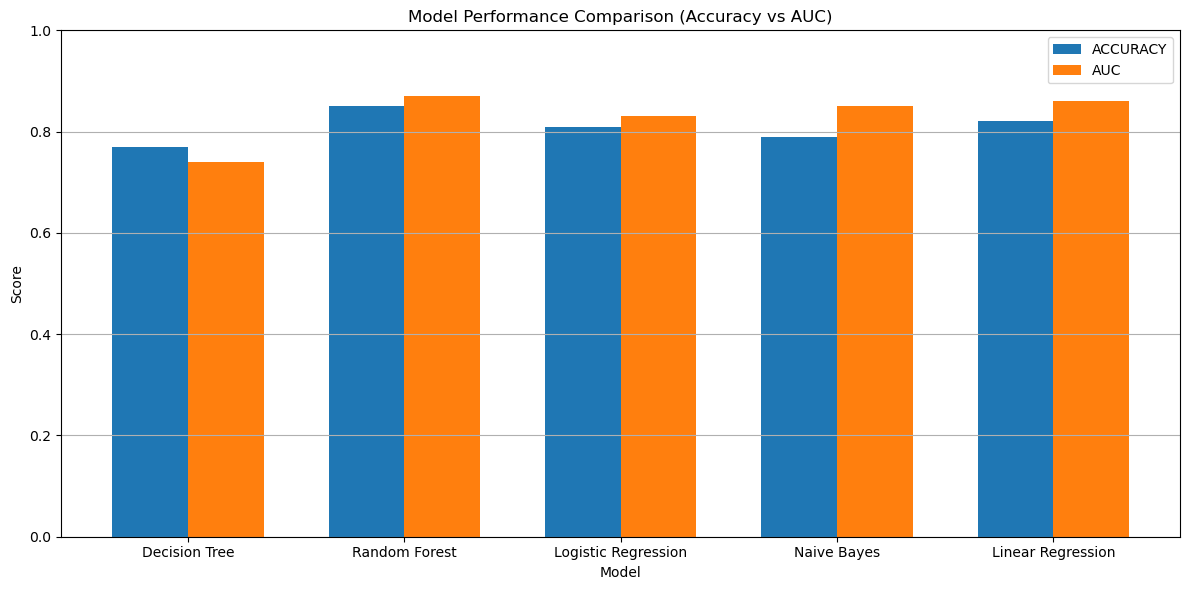

In [74]:
def plot_model_performance(df):
    models = df['model']
    metrics = ['accuracy', 'auc']
    bar_width = 0.35
    index = np.arange(len(models))

    plt.figure(figsize=(12, 6))

    for i, metric in enumerate(metrics):
        plt.bar(index + i * bar_width, df[metric], bar_width, label=metric.upper())

    plt.xlabel('Model')
    plt.ylabel('Score')
    plt.title('Model Performance Comparison (Accuracy vs AUC)')
    plt.xticks(index + bar_width / 2, models)
    plt.ylim(0, 1)
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

plot_model_performance(results_df)

### Subset Model Comparison (Decision Tree vs Random Forest)

In [79]:
import joblib

# Load trained model
rf_model = joblib.load('../models/random_forest_model.pkl')

# Assuming you still have feature names used during training:
feature_names = ["Age", "Gender", "BMI", "PhysicalActivity", "SleepQuality",
                 "FunctionalAssessment", "ADL", "MMSE", 
                 "FamilyHistoryAlzheimers", "CardiovascularDisease", "Depression"]

# Get importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Random Forest - Feature Importances")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=45, ha='right')
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../models/random_forest_model.pkl'

In [ ]:
## Model Results Summary

- Random Forest achieved the best performance with 85% accuracy and 0.87 AUC.
- Logistic Regression and Linear Regression performed very well, both achieving strong balance of accuracy and AUC.
- Naive Bayes and Decision Tree performed slightly lower but still meaningful.
- Feature importance analysis indicates MMSE, ADL, FunctionalAssessment, and Age are key predictors.

## Next Steps

- Finalize Random Forest model for deployment.
- Conduct external validation testing.
- Prepare clinical deployment plan.
